## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_data.loc[mouse_data.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
print(duplicate_mice)

['g989']


In [3]:
# Checking the number of mice.
len(mouse_data["Mouse ID"].unique())

249

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data['Mouse ID'].value_counts().head()

g989    13
r811    10
g316    10
o287    10
k862    10
Name: Mouse ID, dtype: int64

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data[mouse_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_df["Mouse ID"].nunique()

mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean=clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median=clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance=clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stand_dev=clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem=clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_stat=pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance,
                                 "Standard Deviation":stand_dev, "SEM":sem})
summary_stat


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function



sum_df = clean_df.groupby('Drug Regimen')
sum_stat = sum_df.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
sum_stat


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

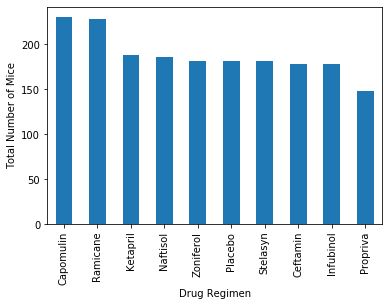

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_plot = clean_df['Drug Regimen'].value_counts()
bar_plot.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.show()


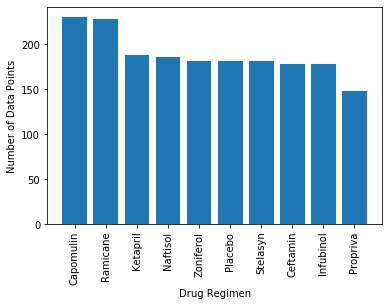

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar2 = clean_df['Drug Regimen'].value_counts()
plt.bar(bar2.index.values,bar2.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

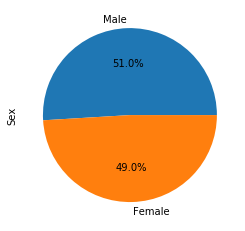

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.Sex.value_counts()
gender.plot(kind="pie",autopct='%1.1f%%')
plt.show()


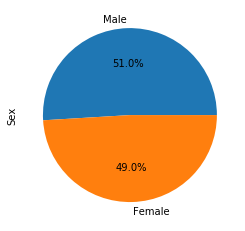

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender2 = clean_df.Sex.value_counts()
plt.pie(gender2.values,labels=gender2.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Start by getting the last (greatest) timepoint for each mouse
max_tumor=clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor=max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df =max_tumor.merge(clean_df, on=["Mouse ID", "Timepoint"],how="left")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

regiment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen_list:
  # Locate the rows which contain mice on each drug and get the tumor volumes    
        tumor_volume = merged_df.loc[merged_df["Drug Regimen"]== drug,"Tumor Volume (mm3)"]
    
    # add subset
        tumor_vol.append(tumor_volume)

    # Determine outliers using upper and lower bounds    
        quartiles = tumor_volume.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers=tumor_volume.loc[(tumor_volume<lower_bound)|(tumor_volume>upper_bound)]

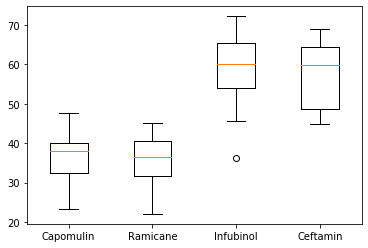

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1=plt.subplots()
ax1.boxplot(tumor_vol,labels=regimen_list)
plt.show()

## Line and Scatter Plots

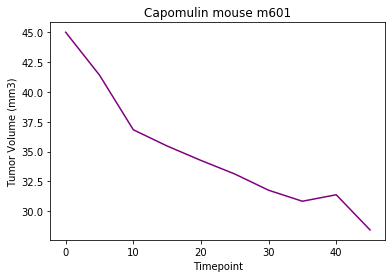

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin=clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_mouse=capomulin.loc[capomulin["Mouse ID"] == "m601",:]
x_axis= capomulin_mouse["Timepoint"]
y_axis = capomulin_mouse["Tumor Volume (mm3)"]

plt.title("Capomulin mouse m601")
plt.plot(x_axis, y_axis, color="purple")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

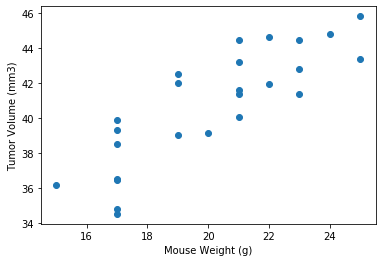

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin=clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_mean =capomulin.groupby(["Mouse ID"]).mean()


plt.scatter(capomulin_mean["Weight (g)"],capomulin_mean["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

## Correlation and Regression

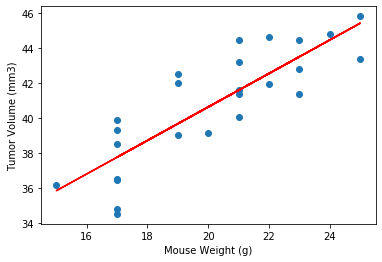

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
capomulin=clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_mean=capomulin.groupby(["Mouse ID"]).mean()


plt.scatter(capomulin_mean["Weight (g)"],capomulin_mean["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(capomulin_mean["Weight (g)"],capomulin_mean["Tumor Volume (mm3)"])
regress_values= capomulin_mean["Weight (g)"] * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.plot(capomulin_mean["Weight (g)"],regress_values,"r-")





plt.show()